# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
from pathlib import Path
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision as tv
from PIL import Image
from torch.utils.data import DataLoader
from torchinfo import summary
from torchvision.models.detection import fcos
from torchvision.transforms import v2 as v2
from tqdm.auto import tqdm, trange

import bb
import models
import tt

LOG = logging.getLogger(__name__)
tt.logging_init()

SEED = 325
tt.seed(SEED)

In [ ]:
data_path = Path.home() / "src/data"
mc_data_path = data_path / "minecraft/info.json"
dset = bb.Dataset.load(mc_data_path)
torch_root = data_path / "torchvision"
ckpt_root = data_path / "checkpoints"

In [ ]:
BATCH_SIZE = 16
TRAIN_PCT = .85

ckpt_file = str(ckpt_root / "checkpoint.pt")
mcd_root = data_path / "coco/minecraft"
mcd = bb.MCDataset(mcd_root)
train_dset, valid_dset = tt.split1(mcd, TRAIN_PCT, SEED)
# bb.plot_bb_grid(images, targets, mcd.categories)

train_loader = DataLoader(
    train_dset,
    batch_size=BATCH_SIZE,
    collate_fn=bb.MCDataset.collate_fn,
    shuffle=True,
    generator=torch.Generator().manual_seed(SEED),
)
val_loader = DataLoader(
    valid_dset,
    batch_size=BATCH_SIZE,
    collate_fn=bb.MCDataset.collate_fn,
)

print(f"n_train={len(train_dset)}, n_valid={len(valid_dset)}")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
n_train=346, n_valid=62


# Experiment Log

## Experiments

### exp1 - classification head only, He init
- cls_head_only_he_init_10ep.pt
- 10 epochs, lr=1e-4
- mAP: 0.0014
- loss looked great, detections terrible

### exp2 - classification head only, FCOS init  
- cls_head_only_fcos_init_8ep.pt
- 10 epochs, lr=1e-4
- mAP: 0.0554
- loss looked worse but 40x better mAP

### exp3 - full head unfrozen, FCOS init
- full_head_10ep.pt
- 10 epochs, lr=1e-4
- mAP: 0.2784
- full_head_20ep.pt
- 20 epochs, lr=1e-4
- mAP: 0.3189
- Much better

### exp3 - full head unfrozen, He init
- mAP - 0.0013
- 10 epochs, lr=1e-4
- Still bad

# Experiments

In [ ]:
NUM_EPOCHS = 10

## Exp 1

Initializing new model
err_keys = <All keys matched successfully>


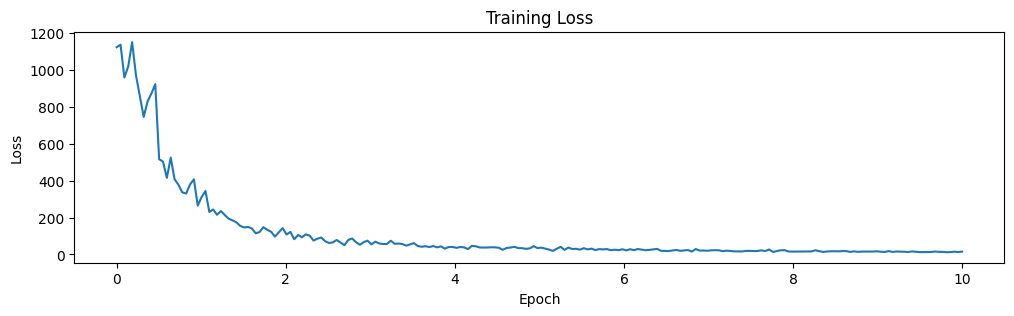

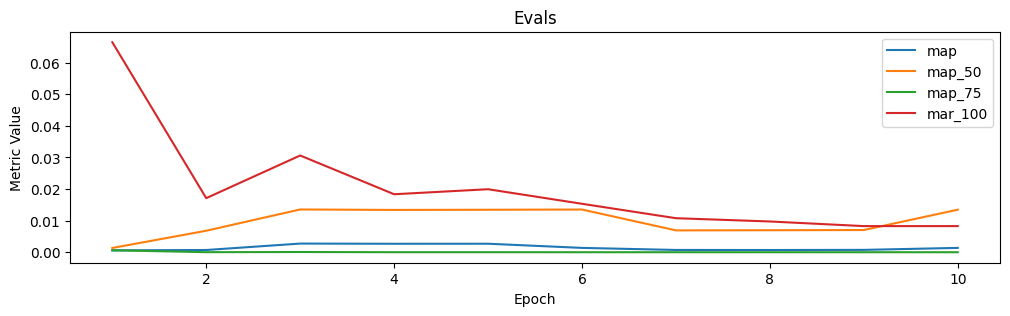

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
he_init_ckpt = ckpt_root / f"cls_head_only_he_init_{NUM_EPOCHS}ep.pt"

# e_he_init = models.FCOSTrainer(categories=mcd.categories, he_init=True)
# e_he_init.train(train_loader=train_loader, val_loader=val_loader, num_epochs=NUM_EPOCHS)
# e_he_init.save_checkpoint(he_init_ckpt)

# e_he_init = models.FCOSTrainer(
#     categories=mcd.categories, he_init=True, checkpoint=he_init_ckpt
# )

## Exp 2

Initializing new model
err_keys = _IncompatibleKeys(missing_keys=['head.classification_head.cls_logits.weight', 'head.classification_head.cls_logits.bias'], unexpected_keys=[])


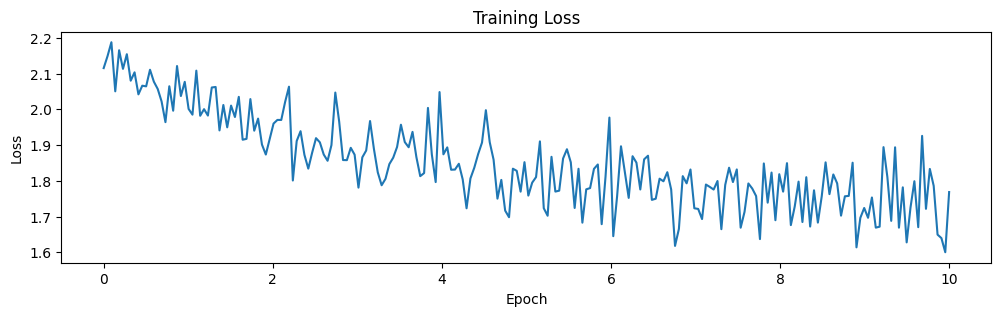

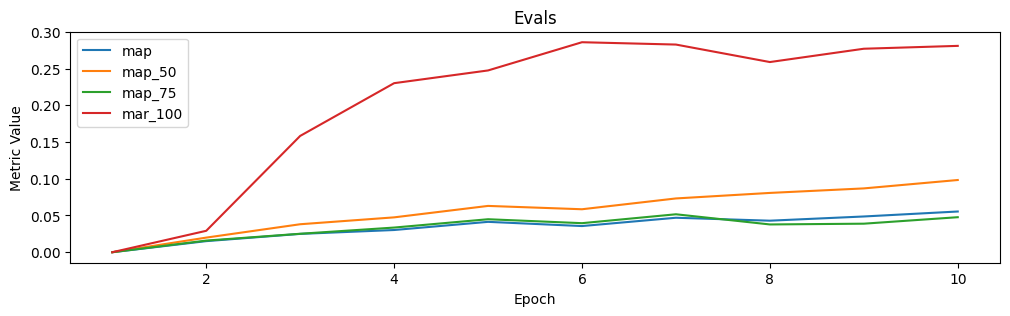

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

Batch:   0%|          | 0/22 [00:00<?, ?it/s]

Eval:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
fcos_init_ckpt = ckpt_root / f"cls_head_only_fcos_init_{NUM_EPOCHS}ep.pt"

# e_fcos_init = models.FCOSTrainer(categories=mcd.categories, he_init=False)
# e_fcos_init.train(train_loader=train_loader, val_loader=val_loader, num_epochs=NUM_EPOCHS)
# e_fcos_init.save_checkpoint(fcos_init_ckpt)

# e_fcos_init = models.FCOSTrainer(
#     categories=mcd.categories, he_init=False, checkpoint=fcos_init_ckpt
# )

## Exp 3

Loading checkpoint: /Users/joe/src/data/checkpoints/full_head_he_10ep.pt
err_keys = <All keys matched successfully>


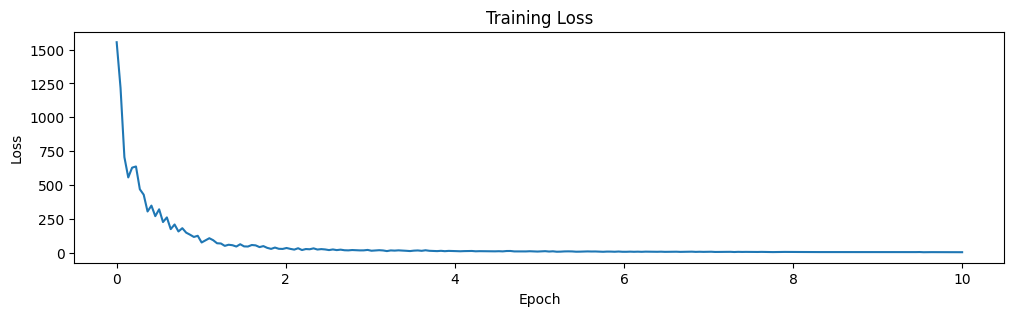

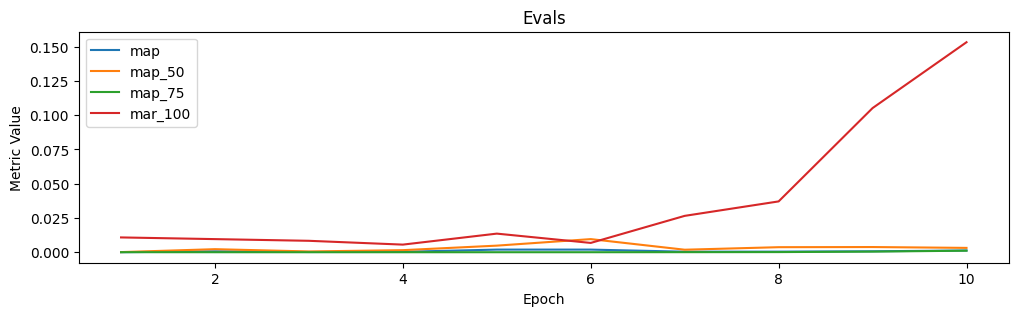

In [ ]:
# e_full_head = models.FCOSTrainer(categories=mcd.categories, he_init=False)
# e_full_head.train(train_loader=train_loader, val_loader=val_loader, num_epochs=NUM_EPOCHS)
# full_head_ckpt = ckpt_root / f"full_head_{e_full_head.total_epochs}ep.pt"
# e_full_head.save_checkpoint(full_head_ckpt)

# extra_epochs = 10
e_full_head = models.FCOSTrainer(
    categories=mcd.categories, he_init=False, checkpoint=full_head_ckpt
)
# e_full_head.train(train_loader=train_loader, val_loader=val_loader, num_epochs=extra_epochs)

# full_head_ckpt = ckpt_root / f"full_head_{e_full_head.total_epochs}ep.pt"
# e_full_head.save_checkpoint(full_head_ckpt)

e_full_head.plot_loss()
e_full_head.plot_eval()

## Exp 5

In [ ]:
NUM_EPOCHS = 20
TRAINER = models.FCOSTrainer(categories=mcd.categories, he_init=False)
CKPT = ckpt_root / f"full_head_lr3{NUM_EPOCHS}ep.pt"

TRAINER.train(train_loader=train_loader, val_loader=val_loader, num_epochs=NUM_EPOCHS)
TRAINER.save_checkpoint(CKPT)

# TRAINER = models.FCOSTrainer(
#     categories=mcd.categories, he_init=False, checkpoint=CKPT
# )

# Fine Tune

In [ ]:
# Test checkpoint
t0 = models.FCOSTrainer(categories=mcd.categories)
t0.save_checkpoint(ckpt_root / "t0.ckpt")
t1 = models.FCOSTrainer(categories=mcd.categories, checkpoint=ckpt_root / "t0.ckpt")
models.compare_models(t0.model, t1.model)

## Compare Inits

In [ ]:
t_fcos_init = models.FCOSTrainer(categories=mcd.categories, he_init=False)
t_he_init = models.FCOSTrainer(categories=mcd.categories, he_init=True)
# t_fcos_init = models.FCOSTrainer(categories=mcd.categories, he_init=False, checkpoint=ckpt_root / "fcos_init.pt")
# t_he_init = models.FCOSTrainer(categories=mcd.categories, he_init=True, checkpoint=ckpt_root / "he_init.pt")

In [ ]:
len(mcd.categories)

In [ ]:
t_fcos_init.model.head.classification_head.cls_logits

In [ ]:
t_he_init.model.head.classification_head.cls_logits

In [ ]:
t_fcos_init.save_checkpoint(ckpt_root / "fcos_init.pt")
t_he_init.save_checkpoint(ckpt_root / "he_init.pt")

## Scratch

In [ ]:
img_ix = 20
e_fcos_init.plot_infer(mcd[img_ix][0], topk=5)

In [ ]:
images, targets = next(iter(train_loader))
bb.plot_bb_grid(images, targets, mcd.categories)

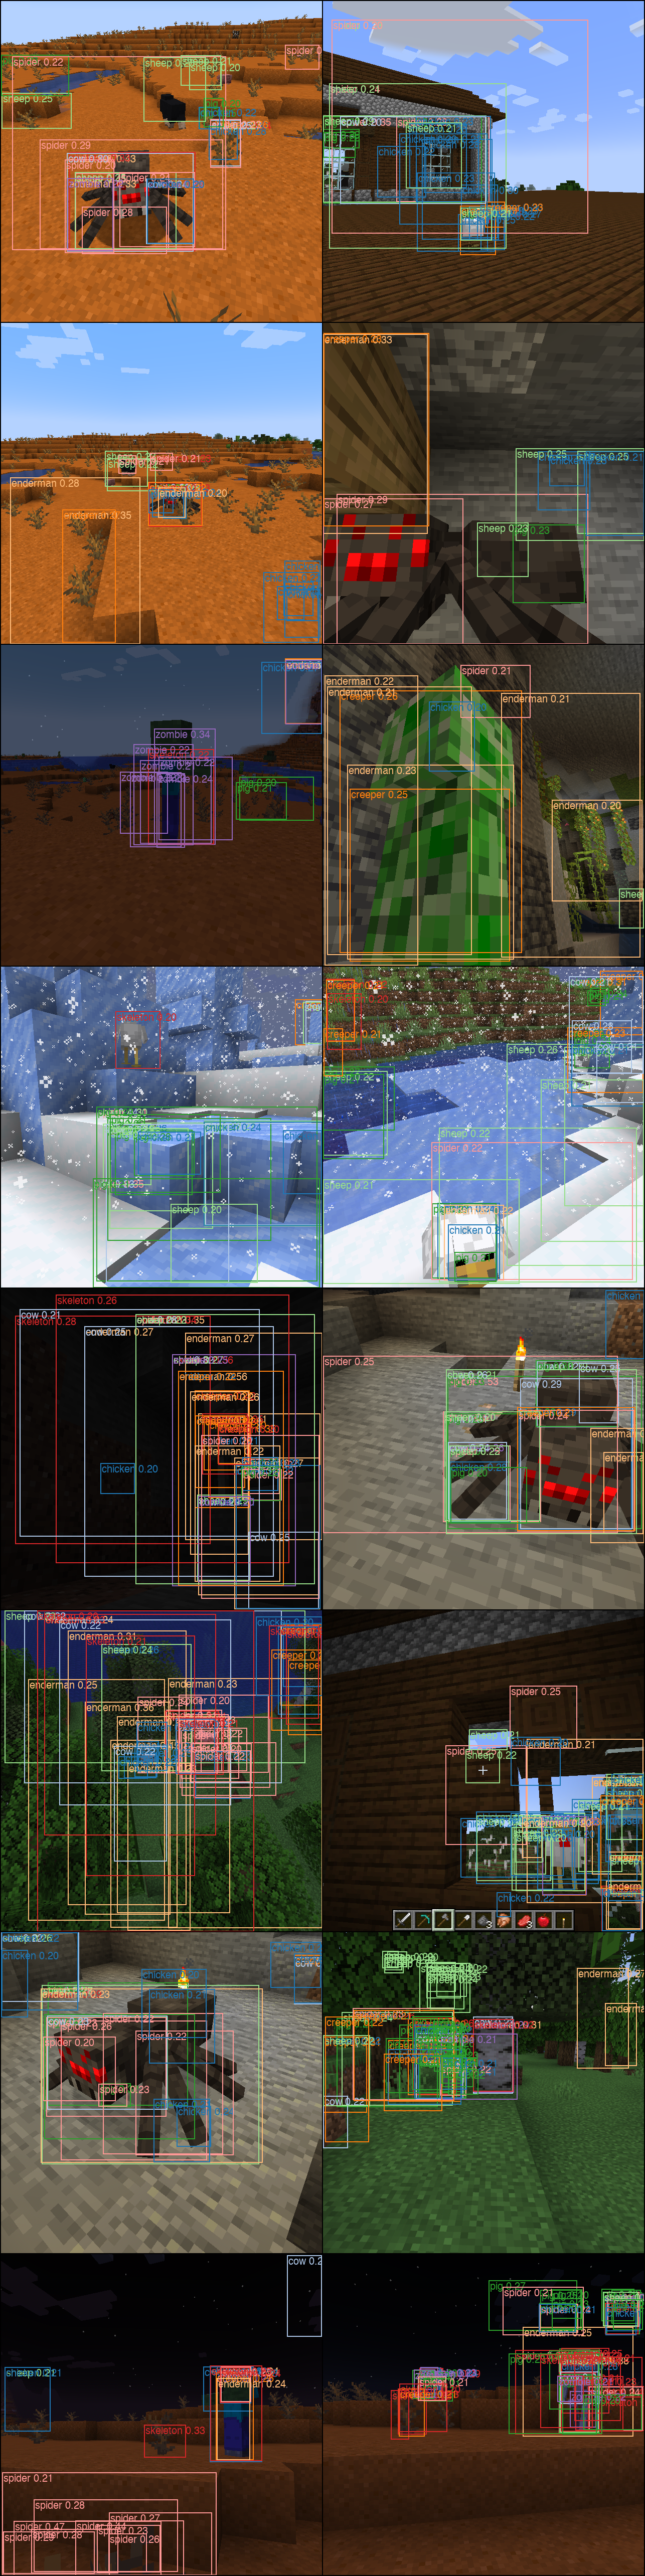

In [ ]:
def show_batch_preds(
    trainer: models.FCOSTrainer,
    data_loader: DataLoader,
    k: int = 5,
) -> Image.Image:
    images, targets = next(iter(data_loader))
    preds = trainer.forward(images)
    # preds = trainer.topk_preds(preds, k=k)
    return bb.plot_bb_grid(images, preds, mcd.categories, include_scores=True, nrow=2)
show_batch_preds(e_full_head, val_loader)